In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import data_collector as dc
import numpy as np

In [3]:
# create a list of the data-series we'd like to upload

# note: we're creating a python dictionary with key:value pairs that include a description of the index
data_series_dict = {'CUSR0000SA0': 'all_item', 
                    'CUSR0000SA0L1E': 'all_item_less_food_energy',
                    'CUSR0000SETA02': 'used_cars_and_trucks'}

In [24]:
bls_collector = dc.BLS_DataCollector()
df_ = bls_collector.get_df(list(data_series_dict.keys()), 2016, 2020)

sending post request...
processing data from post request...
returning data...


In [25]:
df_.head()

data,value,footnotes,value,footnotes,value,footnotes
seriesID,CUSR0000SA0,CUSR0000SA0,CUSR0000SA0L1E,CUSR0000SA0L1E,CUSR0000SETA02,CUSR0000SETA02
dates,,,,,,
2020-12-01,261.564,[{}],269.984,[{}],153.041,[{}]
2020-11-01,260.721,[{}],269.816,[{}],154.739,[{}]
2020-10-01,260.352,[{}],269.332,[{}],156.986,[{}]
2020-09-01,260.190,[{}],269.152,[{}],155.629,[{}]
2020-08-01,259.580,[{}],268.662,[{}],147.599,[{}]


In [26]:
col_headers = ['log_ret', 'perc_chg']

def get_column_names(col_name):
    return [(col_name, sym) for sym in data_series_dict.keys()]

new_col_idx = {col_name: get_column_names(col_name) for col_name in col_headers}

df_[new_col_idx['log_ret']] = np.log(df_['value'] / df_['value'].shift(1))
df_[new_col_idx['perc_chg']] = df_['value'] / df_['value'].shift(1) -1 

In [27]:
df_.head()

data             value   footnotes          value      footnotes  \
seriesID   CUSR0000SA0 CUSR0000SA0 CUSR0000SA0L1E CUSR0000SA0L1E   
dates                                                              
2020-12-01     261.564        [{}]        269.984           [{}]   
2020-11-01     260.721        [{}]        269.816           [{}]   
2020-10-01     260.352        [{}]        269.332           [{}]   
2020-09-01     260.190        [{}]        269.152           [{}]   
2020-08-01     259.580        [{}]        268.662           [{}]   

data                value      footnotes     log_ret                 \
seriesID   CUSR0000SETA02 CUSR0000SETA02 CUSR0000SA0 CUSR0000SA0L1E   
dates                                                                 
2020-12-01        153.041           [{}]         NaN            NaN   
2020-11-01        154.739           [{}]   -0.003228      -0.000622   
2020-10-01        156.986           [{}]   -0.001416      -0.001795   
2020-09-01        155.629           [{}]   -0.000622      -0.000669   
2020-08-01        147.599           [{}]   -0.002347      -0.001822   

data                         perc_chg                                
seriesID   CUSR0000SETA02 CUSR0000SA0 CUSR0000SA0L1E CUSR0000SETA02  
dates                                                                
2020-12-01            NaN         NaN            NaN            NaN  
2020-11-01       0.011034   -0.003223      -0.000622       0.011095  
2020-10-01       0.014417   -0.001415      -0.001794       0.014521  
2020-09-01      -0.008682   -0.000622      -0.000668      -0.008644  
2020-08-01      -0.052976   -0.002344      -0.001821      -0.051597

<AxesSubplot:xlabel='dates'>

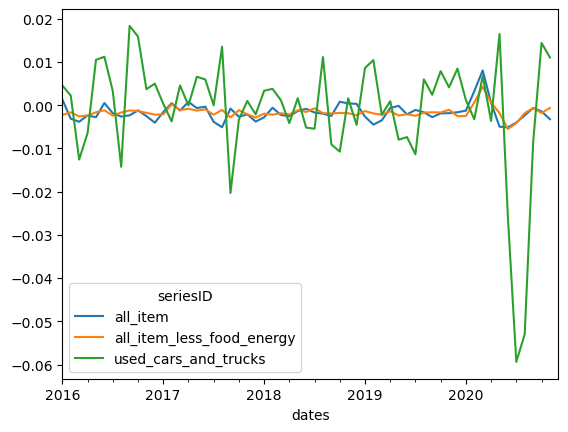

In [29]:
df_['log_ret'].rename(columns=data_series_dict).plot()

In [52]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

In [43]:
df_original = df_.copy()
df_ = df_.rename(columns=data_series_dict)
df_ = df_.iloc[1:]

In [60]:
df_1 = df_['log_ret']['all_item']

In [61]:
adfuller(df_1, autolag='AIC')

(-5.963936397843156,
 2.0084746587280916e-07,
 1,
 56,
 {'1%': -3.552928203580539,
  '5%': -2.9147306250000002,
  '10%': -2.595137155612245},
 -467.73821569179654)

In [ ]:
# small p-value (index=1) suggests data series is in fact stationary!

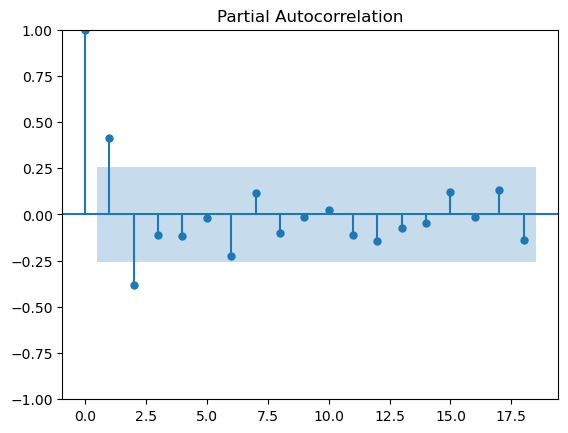

In [62]:
pacf = plot_pacf(df_1, method='ywm')

In [211]:
test_size = 10

In [212]:
train_series = df_1[test_size:]
test_series = df_1[:test_size]

In [224]:
for i in range(4):
    ar_model = AutoReg(train_series, lags = i).fit()
    print(i, ar_model.aic)

0 -486.23679962776396
1 -475.20325755214157
2 -465.7382156917965
3 -453.7362690293279


/home/alistair/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
/home/alistair/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/alistair/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
/home/alistair/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/alistair/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.

In [225]:
# suggests i=0 is best model, will use i=1 for fun
ar_model = AutoReg(train_series, lags = 1).fit()

/home/alistair/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
/home/alistair/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [226]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               all_item   No. Observations:                   48
Model:                     AutoReg(1)   Log Likelihood                 240.602
Method:               Conditional MLE   S.D. of innovations              0.001
Date:                Tue, 20 Dec 2022   AIC                           -475.203
Time:                        14:33:30   BIC                           -469.653
Sample:                             1   HQIC                          -473.115
                                   48                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0014      0.000     -3.931      0.000      -0.002      -0.001
all_item.L1     0.2227      0.150      1.487      0.137      -0.071       0.516
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.4897           +0.0000j            4.4897            0.0000
-----------------------------------------------------------------------------
"""

In [227]:
pred = ar_model.predict(start=len(train_series), end=len(train_series)+len(test_series))

/home/alistair/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/home/alistair/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [228]:
pred.values

array([-0.0010651 , -0.0015987 , -0.00171754, -0.00174401, -0.00174991,
       -0.00175122, -0.00175152, -0.00175158, -0.0017516 , -0.0017516 ,
       -0.0017516 ])

In [229]:
test_series

dates
2020-10-01   -0.001416
2020-09-01   -0.000622
2020-08-01   -0.002347
2020-07-01   -0.004003
2020-06-01   -0.005142
2020-05-01   -0.004961
2020-04-01    0.000586
2020-03-01    0.008054
2020-02-01    0.003256
2020-01-01   -0.001256
Name: all_item, dtype: float64

In [230]:
import pandas as pd
fcast_df = pd.DataFrame(data=pred.values[1:], index=test_series.index)

In [231]:
fcast_df = pd.merge(pd.DataFrame(test_series),fcast_df, left_index=True, right_index=True)

In [232]:
fcast_df

,all_item,0
dates,,
2020-10-01,-0.001416,-0.001599
2020-09-01,-0.000622,-0.001718
2020-08-01,-0.002347,-0.001744
2020-07-01,-0.004003,-0.001750
2020-06-01,-0.005142,-0.001751
2020-05-01,-0.004961,-0.001752
2020-04-01,0.000586,-0.001752
2020-03-01,0.008054,-0.001752
2020-02-01,0.003256,-0.001752


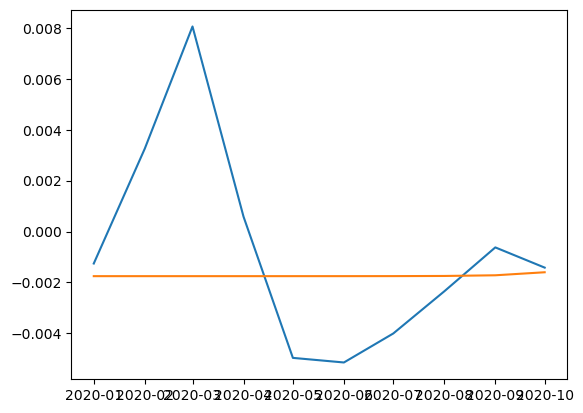

In [233]:
pyplot.plot(fcast_df)